# Achievement 6.4_Supervised Machine Learning_Regression

## Contents
- ### Importing Libraries
- ### Importing Data
- ### Reviewing Data after import
- ### Double checking data is still clean
- ### Data Visual Exploration
- ### Hypothesis
- ### Data Reshaping
- ### Creating Training and Test Sets
- ### Model fitting and prediction creation
- ### Scatterplot for test set regression line
- ### Scatterplot Interpretation
- ### Calculate + Printout MSE and R2 scores
- ### Compare predicted y value vs actual y value
## Regression Model Evaluation
## Reflections on Bias and Limitations

### Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Importing Data

In [2]:
# Load the dataset
working_df = pd.read_csv(r'C:\Users\rewha\Achievement 6 Project\02_Data\02.02_Data Cleaned\Global_Cybersecurity_Threats_2015-2024-First_Pass.csv')

### Reviewing Data after import

In [3]:
# Verify Data Structure
working_df.head()

,Unnamed: 0,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,2,India,2017,Man-In-The-Middle,It,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-State,Social Engineering,AI-based Detection,7
4,4,Germany,2018,Man-In-The-Middle,It,74.41,810682,Insider,Social Engineering,VPN,68


### Double checking data is still clean

In [4]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           3000 non-null   int64  
 1   Country                              3000 non-null   object 
 2   Year                                 3000 non-null   int64  
 3   Attack Type                          3000 non-null   object 
 4   Target Industry                      3000 non-null   object 
 5   Financial Loss (in Million $)        3000 non-null   float64
 6   Number of Affected Users             3000 non-null   int64  
 7   Attack Source                        3000 non-null   object 
 8   Security Vulnerability Type          3000 non-null   object 
 9   Defense Mechanism Used               3000 non-null   object 
 10  Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(4), objec

In [5]:
# Dropping 'Unnamed: 0'
working_df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
# Checking for duplicate rows
duplicates = working_df.duplicated()
print("Duplicate rows found:", duplicates.sum())

Duplicate rows found: 0


In [7]:
# Checking for empty cells
for col in working_df.select_dtypes(include='object').columns:
    empty_count = (working_df[col].str.strip() == '').sum()
    print(f"Empty strings in '{col}':", empty_count)

Empty strings in 'Country': 0
Empty strings in 'Attack Type': 0
Empty strings in 'Target Industry': 0
Empty strings in 'Attack Source': 0
Empty strings in 'Security Vulnerability Type': 0
Empty strings in 'Defense Mechanism Used': 0


### Data Visual Exploration

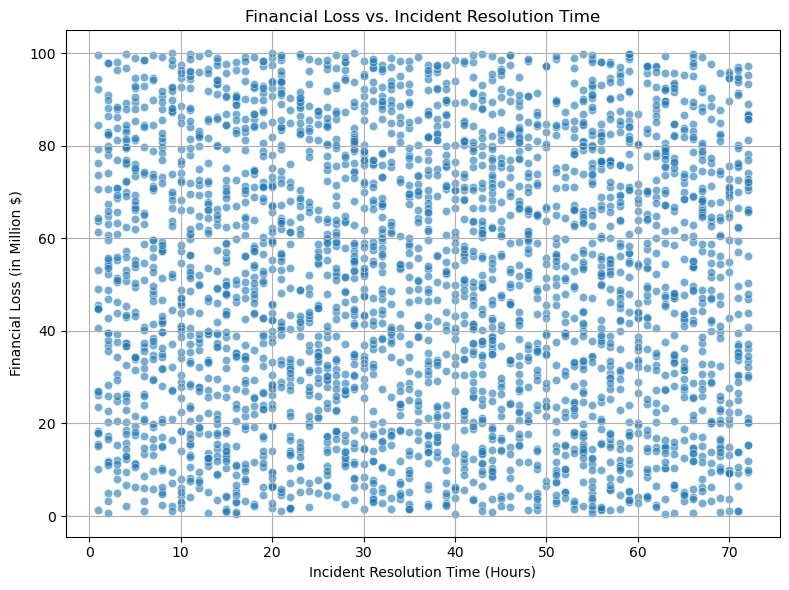

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=working_df, x='Incident Resolution Time (in Hours)', y='Financial Loss (in Million $)', alpha=0.6)
plt.title("Financial Loss vs. Incident Resolution Time")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Financial Loss (in Million $)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Hypothesis

**Hypothesis:** Longer incident resolution times are associated with higher financial losses.

**Null Hypothesis (H₀):** There is no linear relationship between incident resolution time and financial loss.  
**Alternative Hypothesis (H₁):** There is a positive linear relationship between incident resolution time and financial loss.


### Data Reshaping

In [9]:
# Define X and y
X = working_df[['Incident Resolution Time (in Hours)']]
y = working_df['Financial Loss (in Million $)']

In [10]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Creating Training and Test Sets

In [11]:
# Regression object
regression = LinearRegression()

### Model fitting and prediction creation

In [12]:
# Fitting object onto set
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict y values for the test set
y_pred = regression.predict(X_test)

### Scatterplot for test set regression line

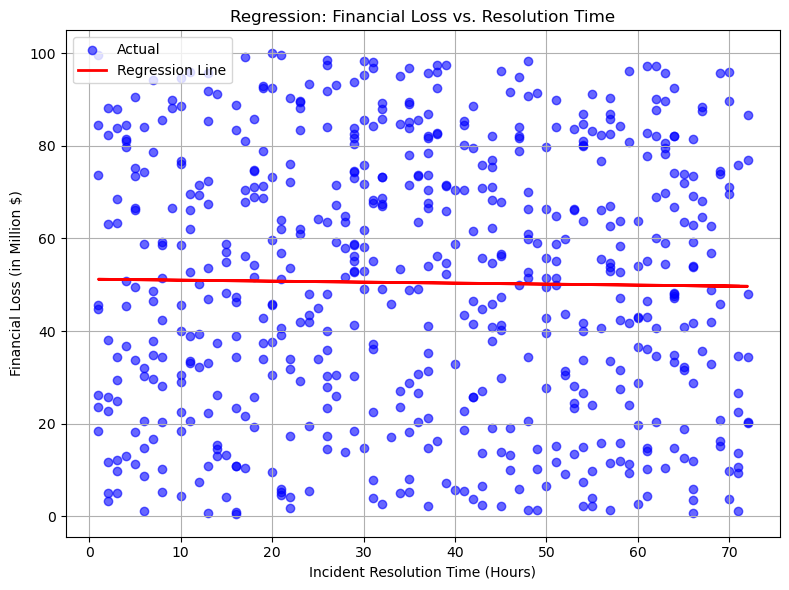

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Regression: Financial Loss vs. Resolution Time")
plt.xlabel("Incident Resolution Time (Hours)")
plt.ylabel("Financial Loss (in Million $)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatterplot Interpretation

The regression line is almost directly horizontal, and due to the points being so spread all over the chart, there is no way the line is close to a good chunk of any part of the data points.

### Calculate + Printout MSE and R2 scores

In [15]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [-0.02143452]
Mean squared error:  808.8873525668116
R2 score:  -0.00031378904375833905


### Compare predicted y value vs actual y value

In [17]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

comparison_df.head(10)

,Actual,Predicted
1801,82.04,49.836971
1190,41.67,49.794102
1817,88.63,50.994435
251,89.22,50.522876
2505,27.38,49.965578
1117,59.67,50.780090
1411,6.58,50.287096
2113,80.37,50.587180
408,70.88,50.287096
2579,68.83,50.522876


## Regression Model Evaluation

The model performed poorly on the test set. The negative R² score (-0.0003) indicates that the model is worse at predicting financial loss than simply using the average loss. This suggests that incident resolution time is not a good predictor of financial loss in this data. The high mean squared error (MSE of 808.89) also shows large prediction errors.

## Reflections on Bias and Limitations

Because the dataset is simulated, it might not fully reflect the complexities of real-world cybersecurity incidents. Potential biases in how the data was generated or what factors were included could limit the model's ability to capture true relationships. For example, if the simulation didn't accurately represent the impact of incident severity or organization size, the model's conclusion that resolution time doesn't matter might be misleading in a real-world context.